In [15]:
# import packages
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from scipy.stats import norm
from sklearn.covariance import EllipticEnvelope

In [2]:
# load data
data = pd.read_csv('anomaly_data.csv')
data.head()

,x1,x2
0,8.046815,9.741152
1,8.408520,8.763270
2,9.195915,10.853181
3,9.914701,11.174260
4,8.576700,9.042849


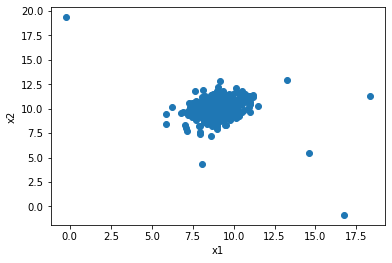

In [3]:
# visualize the data 
fig1 = plt.figure()
plt.scatter(data.loc[:, 'x1'], data.loc[:, 'x2'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [4]:
# define x1 and x2
x1 = data.loc[:, 'x1']
x2 = data.loc[:, 'x2']

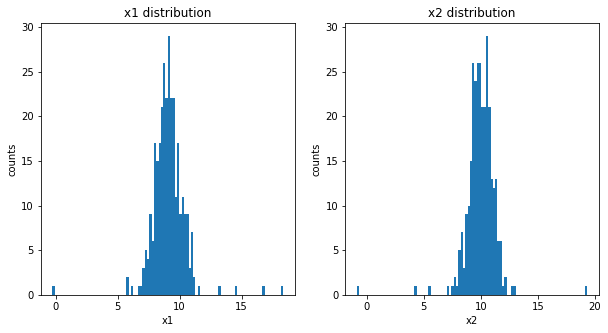

In [14]:
# visuzalie 'x1' and 'x2' data distribution
fig2 = plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.hist(x1, bins = 100)
plt.title('x1 distribution')
plt.xlabel('x1')
plt.ylabel('counts')

plt.subplot(122)
plt.hist(x2, bins = 100)
plt.title('x2 distribution')
plt.xlabel('x2')
plt.ylabel('counts')

plt.show()

In [5]:
# calculate the mean and sigma of x1 and x2
x1_mean = x1.mean()
x1_sigma = x1.std()
x2_mean = x2.mean()
x2_sigma = x2.std()

In [9]:
# calculate the gaussian distribution
x1_range = np.linspace(0, 20, 300)
x1_normal = norm.pdf(x1_range, x1_mean, x1_sigma)
x2_normal = norm.pdf(x1_range, x1_mean, x1_sigma)

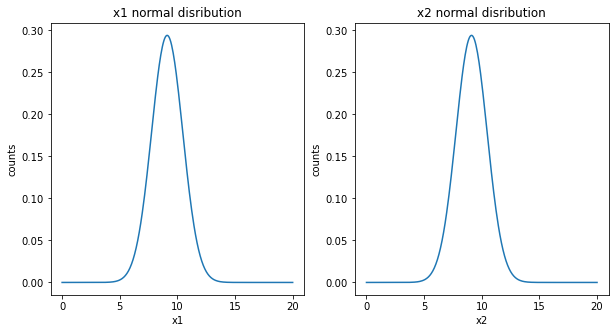

In [24]:
# visualize the normal distribution of x1 and x2
fig2 = plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.plot(x1_range, x1_normal)
plt.title('x1 normal disribution')
plt.xlabel('x1')
plt.ylabel('counts')


plt.subplot(122)
plt.plot(x1_range, x2_normal)
plt.title('x2 normal disribution')
plt.xlabel('x2')
plt.ylabel('counts')

plt.show()

In [16]:
# set up anomaly detection model 
anomaly_detection_model = EllipticEnvelope(contamination=0.03)

In [17]:
# train the model 
anomaly_detection_model.fit(data)

EllipticEnvelope(contamination=0.03)

In [19]:
# make a prediction
y_predict = anomaly_detection_model.predict(data)
print(pd.value_counts(y_predict))

 1    297
-1     10
dtype: int64


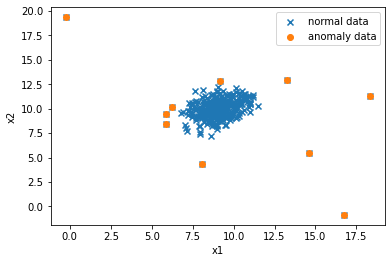

In [20]:
# visualize the outliers 
fig1 = plt.figure()
normal_data = plt.scatter(data.loc[:, 'x1'], data.loc[:, 'x2'], marker = 'x')
anomaly_data = plt.scatter(data.loc[:, 'x1'][y_predict == -1], data.loc[:, 'x2'][y_predict == -1], marker = 'o')

plt.xlabel('x1')
plt.ylabel('x2')

plt.legend((normal_data, anomaly_data), ('normal data','anomaly data'))

plt.show()

In [22]:
# set up the model with different contamination 
anomaly_detection_model = EllipticEnvelope(contamination=0.02)
anomaly_detection_model.fit(data)
y_predict = anomaly_detection_model.predict(data)

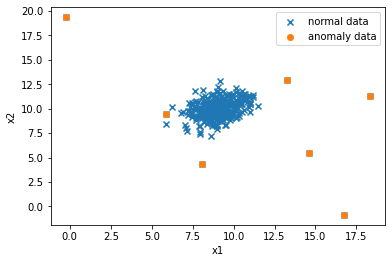

In [23]:
# visualize the outliers
fig1 = plt.figure()
normal_data = plt.scatter(data.loc[:, 'x1'], data.loc[:, 'x2'], marker = 'x')
anomaly_data = plt.scatter(data.loc[:, 'x1'][y_predict == -1], data.loc[:, 'x2'][y_predict == -1], marker = 'o')

plt.xlabel('x1')
plt.ylabel('x2')

plt.legend((normal_data, anomaly_data), ('normal data','anomaly data'))

plt.show()
